In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from ddf_presched import generate_ddf_scheduled_obs
import pandas as pd
from rubin_scheduler.data import get_data_dir
import os

In [2]:
sched_array = generate_ddf_scheduled_obs(ddf_config_file="ocean6.dat")

/Users/yoachim/git_repos/sims_featureScheduler_runs4.3/ddf_ocean/ddf_presched.py:383: UserWarning: Asked for 75 XMM_LSS sequences, but only 58 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs4.3/ddf_ocean/ddf_presched.py:383: UserWarning: Asked for 100 XMM_LSS sequences, but only 72 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs4.3/ddf_ocean/ddf_presched.py:383: UserWarning: Asked for 100 XMM_LSS sequences, but only 74 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs4.3/ddf_ocean/ddf_presched.py:383: UserWarning: Asked for 75 ELAISS1 sequences, but only 46 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs4.3/ddf_ocean/ddf_presched.py:383: UserWarning: Asked for 75 ELAISS1 sequences, but only 48 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_r

In [3]:
sched_array

ScheduledObservationArray([(0, 2.61988465,  0.03898387, 60993.32499967, 60995.32499967, 38. , 'u', '', 0., 0., 0., 0., 1, 'DD:COSMOS', 'DD:COSMOS', 'DD', 'FBS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., -0.31415927, 0.43633231, False),
                           (0, 2.61988465,  0.03898387, 60993.32499967, 60995.32499967, 38. , 'u', '', 0., 0., 0., 0., 1, 'DD:COSMOS', 'DD:COSMOS', 'DD', 'FBS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., -0.31415927, 0.43633231, False),
                           (0, 2.61988465,  0.03898387, 60993.32499967, 60995.32499967, 38. , 'u', '', 0., 0., 0., 0., 1, 'DD:COSMOS', 'DD:COSMOS', 'DD', 'FBS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., -0.31415927, 0.43633231, False),
                           ...,
                           (0, 1.1100294 , -0.83077672, 61430.05416623, 61432.05416623, 29.2, 'z', '', 0., 0., 0., 0., 2, 'DD:EDFS_b', 'DD:EDFS_b', 'DD', 'FBS', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21

In [4]:
np.size(np.unique(sched_array["scheduler_note"]))

6

In [5]:
(sched_array["flush_by_mjd"] - sched_array["mjd"]).min()

ScheduledObservationArray(0.5)

In [6]:
data_file = os.path.join(get_data_dir(), "scheduler", "ddf_grid.npz")
ddf_data = np.load(data_file)
ddf_grid = ddf_data["ddf_grid"].copy()
ddf_data.close()

In [7]:
ddf_name = "XMM_LSS"

(63000.0, 64450.0)

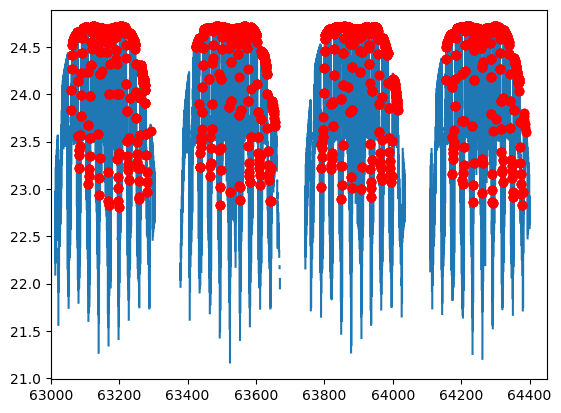

In [8]:
plt.plot(ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
indx_cosms = np.where(sched_array["target_name"] == "DD:%s" % ddf_name)[0]
new_y = np.interp(sched_array["mjd"][indx_cosms], ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
plt.plot(sched_array["mjd"][indx_cosms], new_y, 'ro')
plt.xlim([63000, 64450])

In [9]:
np.unique(sched_array["target_name"])

array(['DD:COSMOS', 'DD:ECDFS', 'DD:EDFS_a', 'DD:EDFS_b', 'DD:ELAISS1',
       'DD:XMM_LSS'], dtype='<U40')

In [10]:
ddf_name = "COSMOS"

(63000.0, 64450.0)

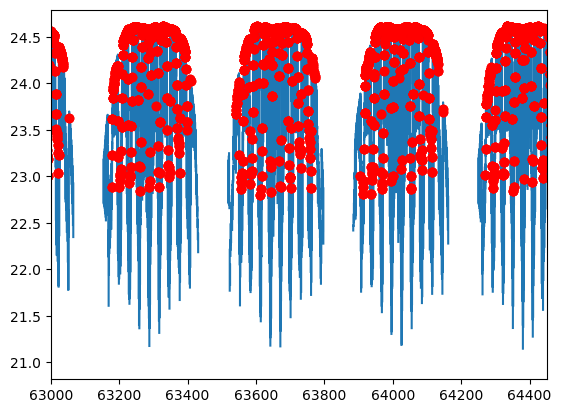

In [11]:
plt.plot(ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
indx_cosms = np.where(sched_array["target_name"] == "DD:%s" % ddf_name)[0]
new_y = np.interp(sched_array["mjd"][indx_cosms], ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
plt.plot(sched_array["mjd"][indx_cosms], new_y, 'ro')
plt.xlim([63000, 64450])

(63500.0, 63820.0)

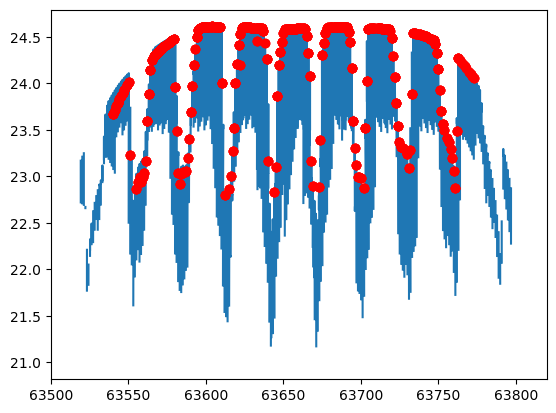

In [14]:
plt.plot(ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
indx_cosms = np.where(sched_array["target_name"] == "DD:%s" % ddf_name)[0]
new_y = np.interp(sched_array["mjd"][indx_cosms], ddf_grid["mjd"], ddf_grid["%s_m5_g" % ddf_name])
plt.plot(sched_array["mjd"][indx_cosms], new_y, 'ro')
plt.xlim([63500, 63820])

In [22]:
ack = sched_array["mjd"][indx_cosms][(sched_array["mjd"][indx_cosms] > 63500) & (63800  > sched_array["mjd"][indx_cosms])]

In [23]:
ack.max() - ack.min()

ScheduledObservationArray(232.64583328)